<a href="https://colab.research.google.com/github/1000PunchMan/DA_Python/blob/main/mini_project_3week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

user_data:  

client – идентификатор пользователя  
premium – является ли клиент премиум  
age – возраст  

logs:  

client – идентификатор пользователя  
success – результат (успех - 1, нет - 0)  
platform – платформа  
time – время в формате Unix  

## Задачи

- Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

- Какой клиент совершил больше всего успешных операций? (success == True)

- С какой платформы осуществляется наибольшее количество успешных операций?

- Какую платформу предпочитают премиумные клиенты?

- Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

- Постройте график распределения числа успешных операций

- Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

https://drive.google.com/file/d/1FN69TZ6iDhzt7WLqT0ry1HZw3POpeY8_/view?usp=sharing

# Основная часть

Импортируйте библиотеку pandas как pd.  
Загрузите два датасета user_data и logs.  
Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!gdown --id 1FN69TZ6iDhzt7WLqT0ry1HZw3POpeY8_

Downloading...
From: https://drive.google.com/uc?id=1FN69TZ6iDhzt7WLqT0ry1HZw3POpeY8_
To: /content/logs.csv
100% 136k/136k [00:00<00:00, 4.30MB/s]


In [ ]:
!gdown --id 1W0qU8cZ9hOj5RLSQxf_7x1jLiIsA5mFg

Downloading...
From: https://drive.google.com/uc?id=1W0qU8cZ9hOj5RLSQxf_7x1jLiIsA5mFg
To: /content/user_data.csv
100% 46.6k/46.6k [00:00<00:00, 6.04MB/s]


In [ ]:
logs = pd.read_csv('/content/logs.csv')
user_data = pd.read_csv('/content/user_data.csv')

In [ ]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
logs.shape

(4500, 4)

4500 строк и 4 столбца

In [ ]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


Отсутствуют пропуски. Все типы данных корректны.

In [ ]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


В данной описательной статистики ничего информативного нет. 

In [ ]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [ ]:
user_data.shape

(2954, 3)

2954 строк и 3 столбца

In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


Oтсутсвтуют пропуски. Все типы данных корректны.

In [ ]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


Здесь же можно увидеть информацию о возрасте, которая может понадобиться для анализа

**Какой клиент совершил больше всего успешных операций? (success == True)**

In [ ]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
t = logs.groupby('client').agg({'success':'sum'}).sort_values(by ='success', ascending = False).reset_index()
t

,client,success
0,82563,41
1,36165,41
2,52870,41
3,12179,41
4,61473,41
...,...,...
4006,54315,0
4007,17713,0
4008,76192,0
4009,76172,0


In [ ]:

t[t['success'] == 41]['client'].sort_values().tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

**С какой платформы осуществляется наибольшее количество успешных операций?**

In [ ]:
success_pl= logs.query('success == True').groupby('platform').agg({'success':'sum'}).reset_index().sort_values(by = 'success',ascending = False)

In [ ]:
success_pl

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


Наибольшее число успешных операций осуществляется с телефона

**Какую платформу предпочитают премиумные клиенты?**

In [ ]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
len(logs['client'].value_counts())

4011

In [ ]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [ ]:
len(user_data['client'].value_counts())

2954

In [ ]:
data = logs.merge(user_data,how='inner',on='client')

In [ ]:
data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [ ]:
data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Большинство примиумных клиентов предпочитают своершать операции через телефон.

**Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)**

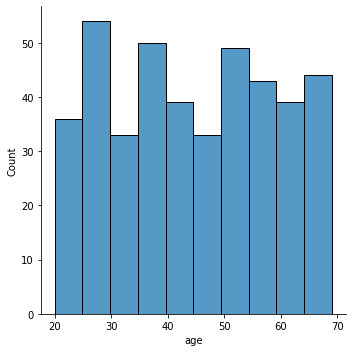

In [ ]:
sns.displot(data.query('premium == True').age)

Возрастная мода премиумных клиентов - 25 лет. Далее по частоте идет 35 лет.

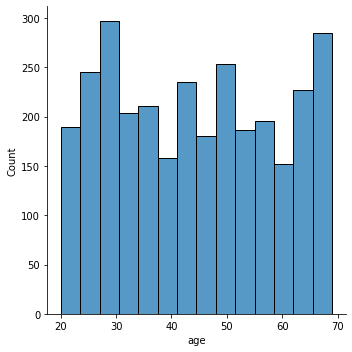

In [ ]:
sns.displot(data.query('premium == False').age)

Среди непремиумных клиентов чаще всего встречается 25 лет. С небольшим отстованием идут клиенты 65 лет. 

**Постройте график распределения числа успешных операций**

In [ ]:
data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


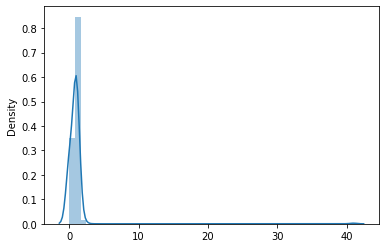

In [ ]:
sns.distplot(data.groupby('client').agg({'success':'sum'}))

Видно, что фактически все успешные операции совершались в диапазоне от 0 до 3. Также есть несколько "выбросов", которые встречаются около 40.

In [ ]:
data.groupby('client').agg({'success':'sum'}).reset_index().success.value_counts()

1     2051
0      850
2       42
41       9
3        1
40       1
Name: success, dtype: int64

Как и было видно на графике, основная доля операций в диапазоне 0-2, также 10 значений с показателем 40+

**Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?**

In [ ]:
t = data.query('success == True and platform == "computer"').groupby('age', as_index = False).agg({'success':'count'})

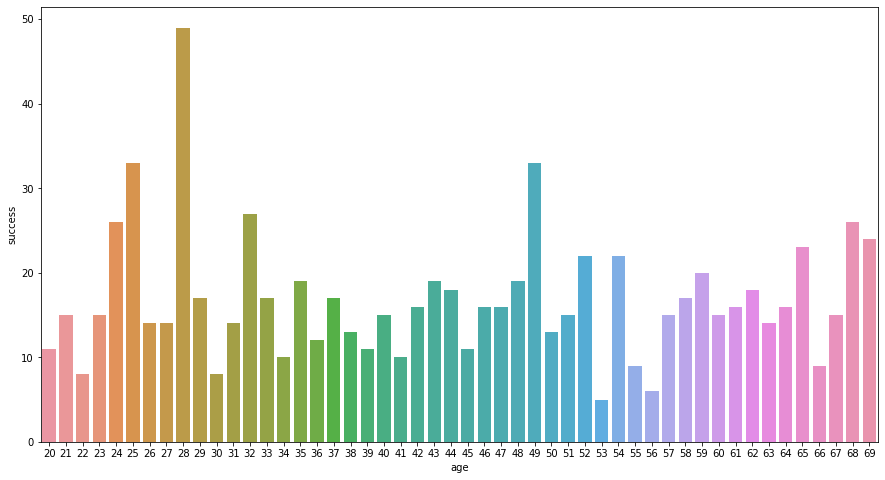

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x ='age', y='success', data = t)

Исходя из графика, можно сказать, что наибольшее кол-во успешных действий совершили клиенты 28 лет.

2 вариант

In [ ]:
comp_suc = data.query('success == True and platform == "computer"')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


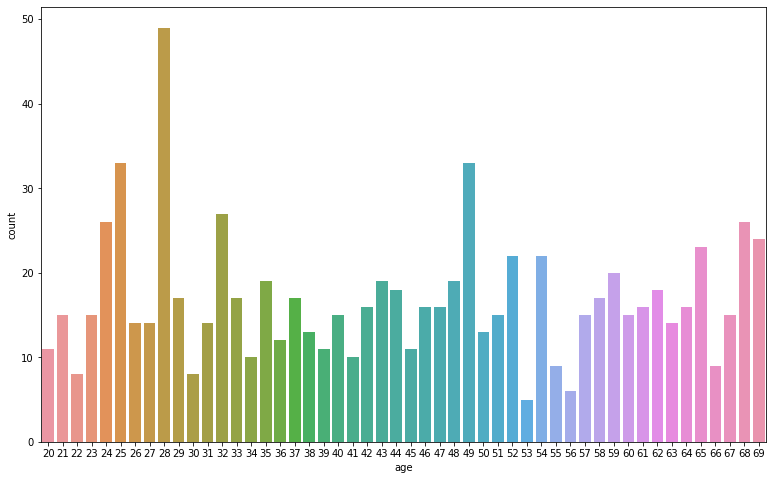

In [ ]:
plt.figure(figsize = (13,8))
sns.countplot(comp_suc['age'])